In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [41]:
df = pd.read_csv('file.csv')
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [42]:
df['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [43]:
df['tweets'].duplicated().value_counts()

False    217622
True       1672
Name: tweets, dtype: int64

In [49]:
df.shape

(217622, 3)

In [46]:
df = df.drop_duplicates(subset=['tweets']) # Drop the duplicated rows within the 'tweets' column

In [48]:
df['tweets'].duplicated().value_counts()

False    217622
Name: tweets, dtype: int64

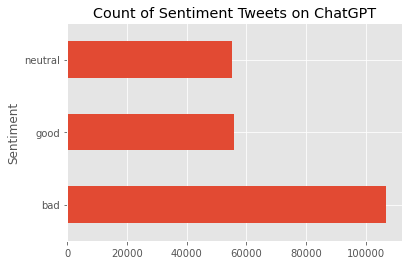

In [60]:
ax_labels = df['labels'].value_counts() \
            .plot(kind='barh', 
                    xlabel='Sentiment', 
                    ylabel='Number of Tweet',
                    title='Count of Sentiment Tweets on ChatGPT')

plt.show()

## Vader Sentiment Scoring

In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [71]:
#Run the polarity score

result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    tweets  = row ['tweets']
    myid    = row ['Unnamed: 0']
    result[myid] = sia.polarity_scores(tweets)

In [89]:
#Create a new dataframe for the results

vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left', on='Id')

In [93]:
vaders

,Id,neg,neu,pos,compound,tweets,labels
0,0,0.0,0.700,0.300,0.4588,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,0.0,0.677,0.323,0.8225,"Try talking with ChatGPT, our new AI system wh...",good
2,2,0.0,0.889,0.111,0.4588,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,0.0,0.597,0.403,0.9029,"THRILLED to share that ChatGPT, our new model ...",good
4,4,0.0,1.000,0.000,0.0000,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...,...,...,...,...
217617,219289,0.0,1.000,0.000,0.0000,Other Software Projects Are Now Trying to Repl...,bad
217618,219290,0.0,0.877,0.123,0.6360,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
217619,219291,0.0,1.000,0.000,0.0000,chatgpt is being disassembled until it can onl...,bad
217620,219292,0.0,1.000,0.000,0.0000,2023 predictions by #chatGPT. Nothing really s...,bad


### Plotting Vader's results

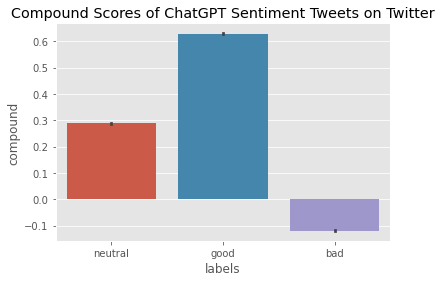

In [97]:
comp_plot = sns.barplot(data=vaders,
                        x = 'labels',
                        y = 'compound')
comp_plot.set_title('Compound Scores of ChatGPT Sentiment Tweets on Twitter')
plt.show()